In [1]:
#General imports.
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
import os
import scipy

import uproot # https://indico.cern.ch/event/686641/contributions/2894906/attachments/1606247/2548596/pivarski-uproot.pdf
from awkward import JaggedArray
from root_pandas import read_root # https://github.com/scikit-hep/root_pandas

import warnings
warnings.filterwarnings('once')

%matplotlib inline
plt.rcParams['figure.facecolor'] = 'white'

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.
Welcome to JupyROOT 6.12/06


In [79]:
import csv
vec = []


with open('fileopen.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=' ')
    line_count = 0
    for row in csv_reader:
        for x in row:
            try:
                float(x)
                vec.append(float(x))
            except:
                continue

In [80]:
floatvec = []
for x in vec:
    try:
        float(x)
        floatvec.append(float(x))
    except:
        continue

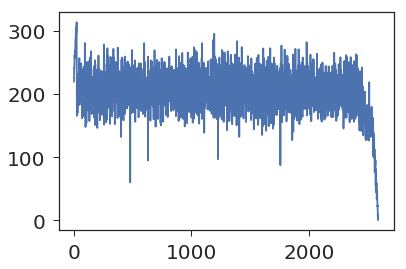

In [81]:
plt.plot(floatvec)
plt.show()

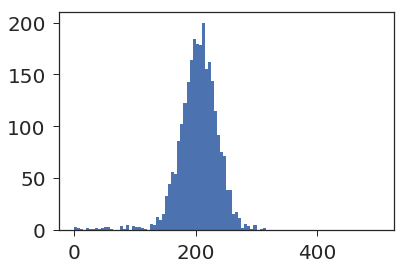

In [82]:
plt.hist(floatvec,bins=100,range=(0,500))
plt.show()

In [83]:
np.sum(floatvec)/1000./60./16.

0.5510593657833333

In [84]:
import csv
vec = []
with open('filespline.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=' ')
    line_count = 0
    for row in csv_reader:
        for x in row:
            try:
                float(x)
                vec.append(float(x))
            except:
                continue

In [85]:
splinevec = []
for x in vec:
    try:
        float(x)
        splinevec.append(float(x))
    except:
        continue

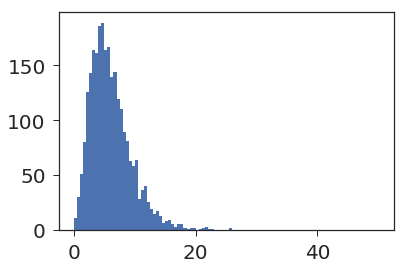

In [86]:
plt.hist(splinevec,bins=100,range=(0,50))
plt.show()

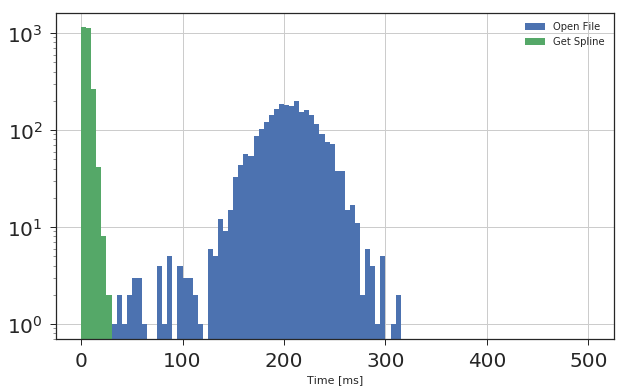

In [87]:
fig, ax = plt.subplots(figsize=(10,6))

plt.hist(floatvec,bins=100,range=(0,500),label='Open File')
plt.hist(splinevec,bins=100,range=(0,500), label='Get Spline')

plt.xlabel("Time [ms]")
plt.legend()
plt.grid()

plt.yscale('log')
plt.show()

In [88]:
#right now it takes this much time to open the files
timemean = np.mean(splinevec) + np.mean(floatvec)
print(timemean, 'ms')

210.2311198168746 ms


In [100]:
timetotal = (np.sum(splinevec) + np.sum(floatvec))/1000. #timemean*1024*2/1000.
print("So the total time is: ", timetotal, "seconds over all cores")

So the total time is:  544.6967188709999 seconds over all cores


In [101]:
print("But parallelized so the real time is:", timetotal/16., "seconds")

But parallelized so the real time is: 34.043544929437495 seconds


---

This is about what our time tracking numbers show. So right now this would take ~27 seconds. What about if we had one file per calorimeter?

In [102]:
#assume it takes twice as long to open the larger file, slightly longer to get spline
timenew = 2*(24*(1*np.mean(floatvec)*2 + 54*np.mean(splinevec)*1.1))/1000. 
print("So the new total time is:", timenew, 'seconds')

So the new total time is: 36.86847016421557 seconds


In [103]:
print("and user time: ", timenew/16.)

and user time:  2.3042793852634733


---

### Now lets see how we did!

In [93]:
import csv
openvec = []


with open('output_calotemplates_fileopen.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=' ')
    line_count = 0
    for row in csv_reader:
        for x in row:
            try:
                float(x)
                openvec.append(float(x))
            except:
                continue

In [94]:
import csv
splinevec_new = []


with open('output_calotemplates_spline.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=' ')
    line_count = 0
    for row in csv_reader:
        for x in row:
            try:
                float(x)
                splinevec_new.append(float(x))
            except:
                continue

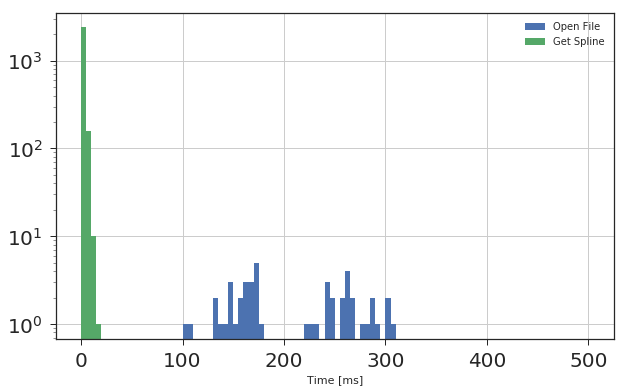

In [95]:
fig, ax = plt.subplots(figsize=(10,6))

plt.hist(openvec,bins=100,range=(0,500),label='Open File')
plt.hist(splinevec_new,bins=100,range=(0,500), label='Get Spline')

plt.xlabel("Time [ms]")
plt.legend()
plt.grid()

plt.yscale('log')
plt.show()

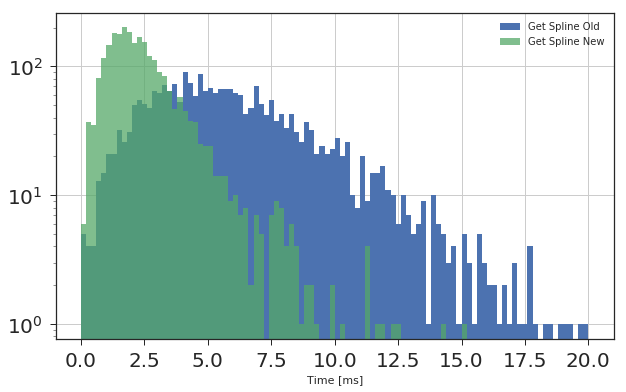

In [96]:
fig, ax = plt.subplots(figsize=(10,6))

plt.hist(splinevec,bins=100,range=(0,20), label='Get Spline Old')
plt.hist(splinevec_new,bins=100,range=(0,20), label='Get Spline New',alpha=0.75)

plt.xlabel("Time [ms]")
plt.legend()
plt.grid()

plt.yscale('log')
plt.show()

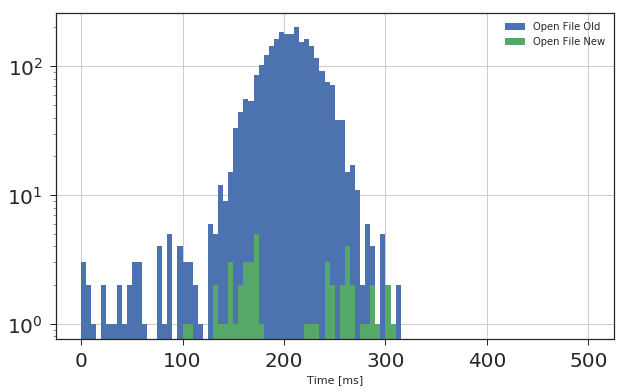

In [29]:
fig, ax = plt.subplots(figsize=(10,6))

plt.hist(floatvec,bins=100,range=(0,500),label='Open File Old')
plt.hist(openvec,bins=100,range=(0,500), label='Open File New')

plt.xlabel("Time [ms]")
plt.legend()
plt.grid()

plt.yscale('log')
plt.show()

In [30]:
np.mean(openvec)

209.33158333333333

In [31]:
np.mean(splinevec_new)

2.4988533662631784

In [97]:
(np.sum(openvec) + np.sum(splinevec_new))/1000.

16.447479470999998

In [98]:
(np.sum(openvec) + np.sum(splinevec_new))/1000./16

1.0279674669374999

---

### Now we can use this same setup to track down a couple of bugs

In [106]:
import csv
v1 = []

with open('island_fit_time_oldtemplates.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=' ')
    line_count = 0
    for row in csv_reader:
        for x in row:
            try:
                float(x)
                v1.append(float(x))
            except:
                continue

In [107]:
print(v1[:10])

[9.33145, 12.2757, 12.306, 3.28999, 7.22934, 8.77276, 10.6227, 2.30481, 18.1492, 53.661]


In [108]:
print(np.amax(v1))

781.778


In [109]:
import csv
v2 = []


with open('island_fit_time_newtemplates.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=' ')
    line_count = 0
    for row in csv_reader:
        for x in row:
            try:
                float(x)
                v2.append(float(x))
            except:
                continue

In [110]:
print(v2[:10])

[9.28689, 9.69829, 9.75049, 9.96558, 9.98863, 10.1816, 2.36995, 6.96368, 6.49102, 6.55372]


In [111]:
print(np.amax(v2))

1992.92


In [112]:
print(len(v1), len(v2))

41755 41850


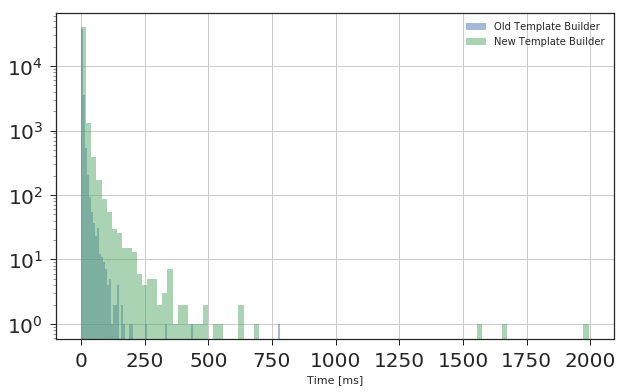

In [113]:
fig, ax = plt.subplots(figsize=(10,6))

plt.hist(v1,bins=100,label='Old Template Builder', alpha=0.5)
plt.hist(v2,bins=100, label='New Template Builder',alpha=0.5)

plt.xlabel("Time [ms]")
plt.legend()
plt.grid()

plt.yscale('log')
plt.show()

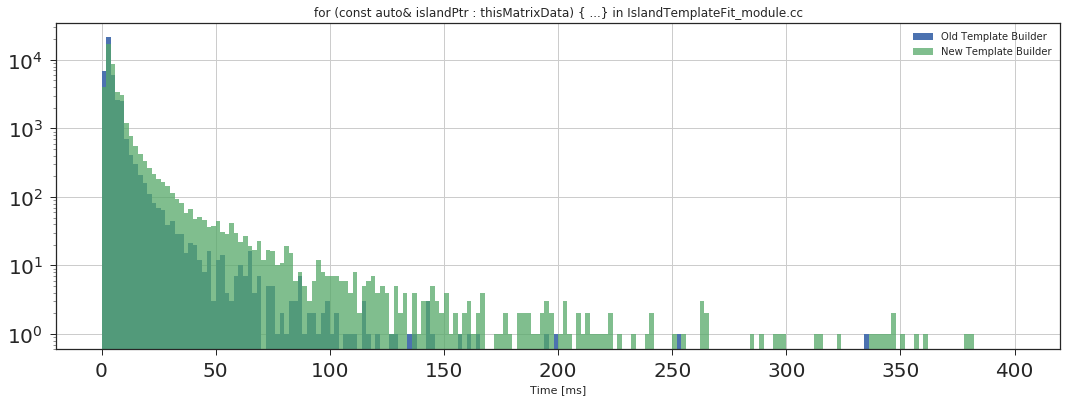

In [126]:
fig, ax = plt.subplots(figsize=(18,6))

plt.hist(v1,bins=200,range=(0,400),label='Old Template Builder')
plt.hist(v2,bins=200,range=(0,400),label='New Template Builder', alpha=0.75)

plt.title("for (const auto& islandPtr : thisMatrixData) { ... } in IslandTemplateFit_module.cc")

plt.xlabel("Time [ms]")
plt.legend()
plt.grid()

plt.yscale('log')
plt.show()

In [122]:
deltat = np.sum(v2) - np.sum(v1)
print("*****THIS IS ONLY COUNTING THE NUMBERS WHICH ARE CORRECTLY FORMATTED*****")
print("Time difference:", deltat, "ms (over parallel cores)")
print("                ", deltat/16., "ms (real, approx.)")
print("                ", deltat/16./1000., "s  (real, approx.)")
print("                ", deltat/16./1000./44, "s/event (real, approx.)")

*****THIS IS ONLY COUNTING THE NUMBERS WHICH ARE CORRECTLY FORMATTED*****
Time difference: 115116.60999700005 ms (over parallel cores)
                 7194.788124812503 ms (real, approx.)
                 7.194788124812503 s  (real, approx.)
                 0.1635179119275569 s/event (real, approx.)


In [121]:
deltatscaled = np.sum(v2)*(len(v1)/len(v2)) - np.sum(v1)
print("*****THIS IS USING A SCALE FACTOR TO TRY TO CORRECT FOR THE DIFFERENCE IN THESE NUMBERS*****")
print("Time difference:", deltatscaled, "ms (over parallel cores)")
print("                ", deltatscaled/16., "ms (real, approx.)")
print("                ", deltatscaled/16./1000., "s  (real, approx.)")
print("                ", deltatscaled/16./1000./44, "s/event (real, approx.)")

*****THIS IS USING A SCALE FACTOR TO TRY TO CORRECT FOR THE DIFFERENCE IN THESE NUMBERS*****
Time difference: 114400.32480753414 ms (over parallel cores)
                 7150.020300470884 ms (real, approx.)
                 7.150020300470883 s  (real, approx.)
                 0.16250046137433827 s/event (real, approx.)


---

In [127]:
20/0.1625

123.07692307692307

In [128]:
11.4*6

68.4